In [31]:
import skimage.io as io
imagen=io.imread(fname="ducks01_0100.jpg")

In [2]:
import matplotlib.pyplot as plt
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[7,7])
    ax.imshow(imagen)
    plt.show()
def mostrar_imagen_bn(imagen):
    fig,ax=plt.subplots(figsize=[7,7])
    ax.imshow(imagen,cmap='gray')
    plt.show()

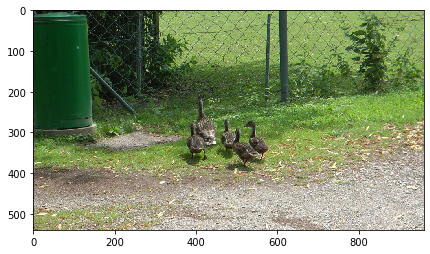

In [3]:
mostrar_imagen(imagen)

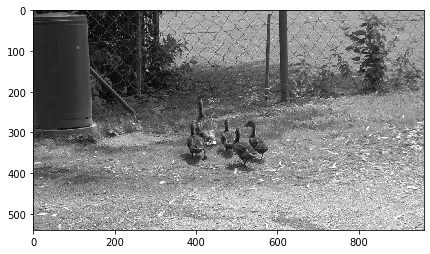

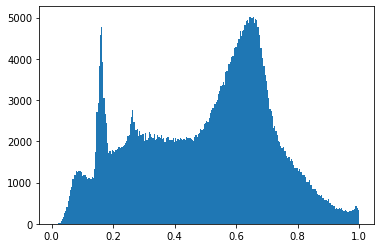

In [4]:
from skimage.color import rgb2gray
imagen_blanco_negro=rgb2gray(imagen)
mostrar_imagen_bn(imagen_blanco_negro)
plt.hist(imagen_blanco_negro.ravel(),bins=255)
plt.show()

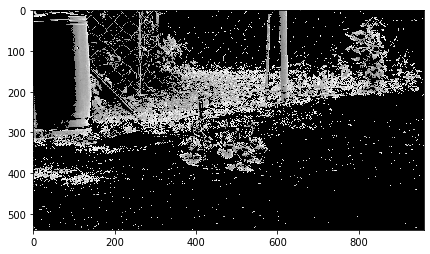

In [6]:
import numpy as np
imagen_bn=imagen_blanco_negro.copy()
min_color=0.20
max_color=0.40
imagen_bn[np.logical_and(min_color>imagen_bn,imagen_bn<max_color)]=1
imagen_bn[np.logical_and(0<=imagen_bn,imagen_bn<=min_color)]=0
imagen_bn[np.logical_and(max_color<=imagen_bn,imagen_bn<=1)]=0

mostrar_imagen_bn(imagen_bn)

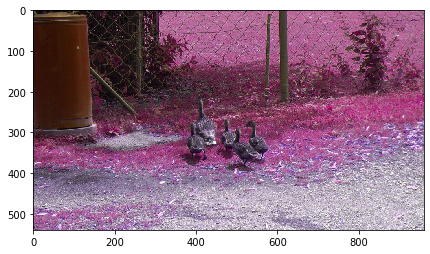

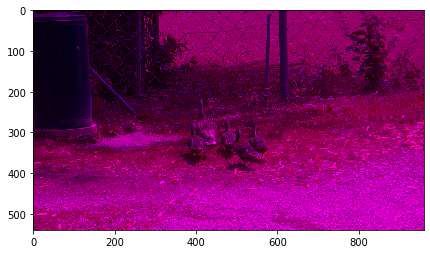

In [42]:
import numpy as np
from skimage import img_as_float
img_mix=np.zeros(imagen.shape)
imagen_float=img_as_float(imagen)
img_mix[:,:,0]=imagen_float[:,:,1]
img_mix[:,:,1]=imagen_float[:,:,2]
img_mix[:,:,2]=imagen_float[:,:,0]
mostrar_imagen(img_mix)
img=np.zeros(imagen.shape, dtype=int)
red=imagen[:,:,0]
green=imagen[:,:,1]
blue=imagen[:,:,2]
img[:,:,0]=red
img[:,:,1]=0
img[:,:,2]=blue
mostrar_imagen(img)

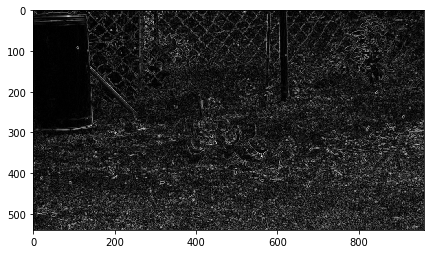

In [45]:
from skimage.filters import sobel
im_sobel=sobel(rgb2gray(img_mix))
mostrar_imagen_bn(im_sobel)

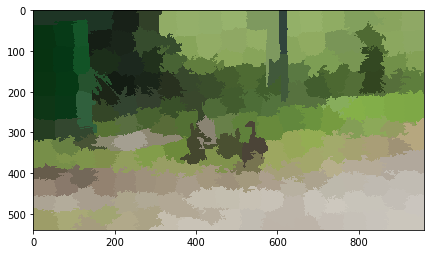

118
118
93


75.0

80.0

55.0

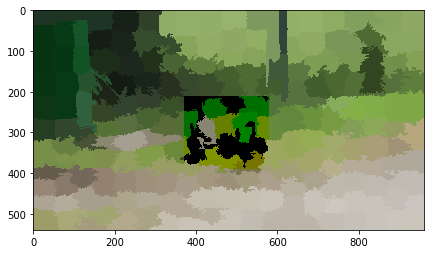

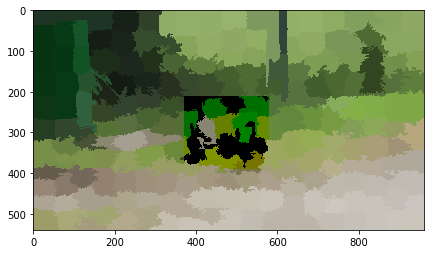

205

0

In [77]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt
img_segments = segmentation.slic(imagen, compactness=20, n_segments=200)
superpixels = color.label2rgb(img_segments, imagen, kind='avg')
mostrar_imagen(superpixels)
print(img_segments[320,580])
print(np.max(img_segments[320:340,580:600]))
print(np.min(img_segments[320:340,580:600]))
imagen_pat_pixl=superpixels.copy()
#imagen_pat_pixl[80:110,120:180] = 0
#imagen_pat_pixl[(imagen_pat_pixl>220)&(imagen_pat_pixl<348)] = 1
minx=370
maxx=580
miny=210
maxy=390
matrix=imagen_pat_pixl[320:340,450:580]
median_red=np.median(matrix[:,:,0])
median_blue=np.median(matrix[:,:,1])
median_green=np.median(matrix[:,:,2])
display(median_red)
display(median_blue)
display(median_green)

radius=25
image_mat=imagen_pat_pixl[miny:maxy,minx:maxx]
(A,B,C)=image_mat.shape
for i in range(A):
    for j in range(B):        
            if median_red-radius<=image_mat[i,j,0]<=median_red+radius:
                image_mat[i,j,0] = 0
            if median_blue-radius<=image_mat[i,j,1]<=median_blue+radius:
                image_mat[i,j,1] = 0
            if median_green-radius<=image_mat[i,j,2]<=median_green+radius:
                image_mat[i,j,2] = 0
            
mostrar_imagen(imagen_pat_pixl)
mostrar_imagen(imagen_pat_pixl)
display(np.max(imagen_pat_pixl),np.min(imagen_pat_pixl))



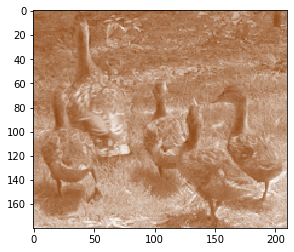

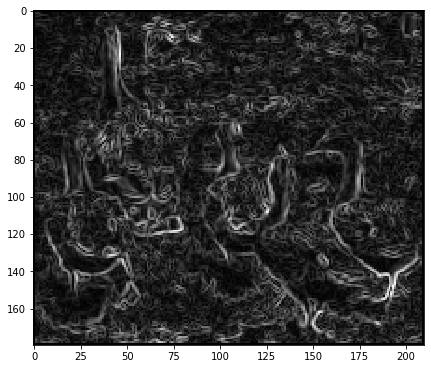

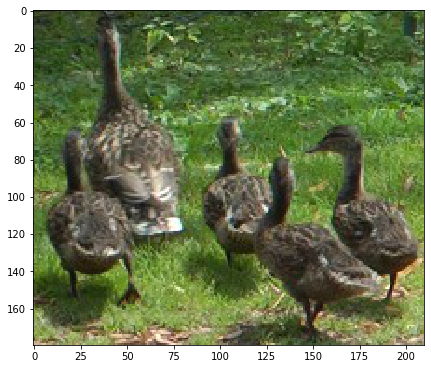

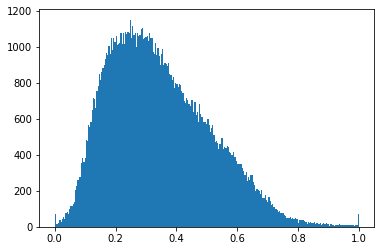

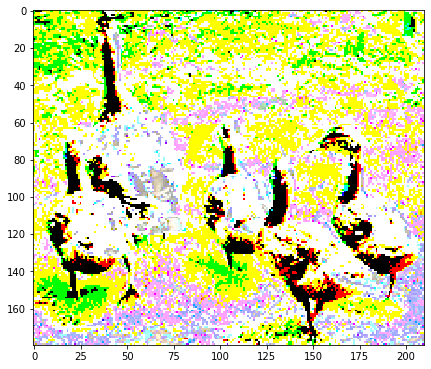

In [159]:
from matplotlib.colors import LinearSegmentedColormap
from skimage.color import rgb2hed
image_m=imagen.copy()
image_mt=image_m[miny:maxy,minx:maxx]
# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_hed = rgb2hed(image_mt)
plt.imshow(ihc_hed[:, :, 0], cmap=cmap_dab)
isob=sobel(ihc_hed[:, :, 0])
mostrar_imagen_bn(isob)
mostrar_imagen(image_mt)
image_mt=img_as_float(image_mt)

plt.hist(image_mt.ravel(),bins=255)
plt.show()
image_mt[np.logical_and(image_mt>0.2,image_mt<0.6)]=1
image_mt[np.logical_and(image_mt<=0,image_mt<=0.2)]=0
image_mt[np.logical_and(image_mt<=0.6,image_mt<=1)]=0
mostrar_imagen(image_mt)

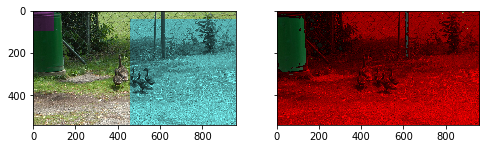

In [132]:
from skimage import data
from skimage import color
from skimage.filters import rank
from skimage import img_as_float

imagen=img_as_float(imagen)

def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)
# Square regions defined as slices over the first two dimensions.
top_left = (slice(100),) * 2
print()
bottom_right = (slice(-100, None),) * 2
#top_left=imagen[320:340,450:580]

sliced_image = imagen.copy()
sliced_image[top_left] = colorize(imagen[top_left], 0.82, saturation=0.5)
sliced_image[bottom_right] = colorize(imagen[bottom_right], 0.5, saturation=0.5)

# Create a mask selecting regions with interesting texture.
noisy = rank.entropy(imagen_blanco_negro, np.ones((9, 9)))
textured_regions = noisy > 4
# Note that using `colorize` here is a bit more difficult, since `rgb2hsv`
# expects an RGB image (height x width x channel), but fancy-indexing returns
# a set of RGB pixels (# pixels x channel).
red_multiplier = [1, 0, 0]
masked_image = imagen.copy()
masked_image[textured_regions, :] *= red_multiplier

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(sliced_image)
ax2.imshow(masked_image)

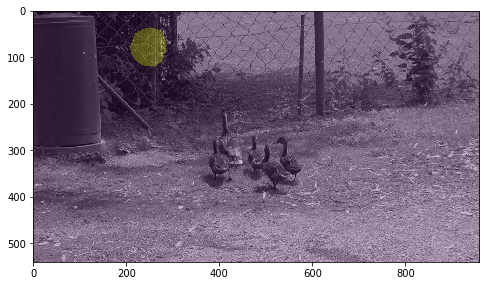

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    return fig, ax
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]
image_labels = np.zeros(imagen_blanco_negro.shape, dtype=np.uint8)
indices = draw.circle_perimeter(80, 250,20)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
#image_show(image_labels);
image_segmented = seg.random_walker(imagen_blanco_negro, image_labels)
# Check our results
fig, ax = image_show(imagen_blanco_negro)
ax.imshow(image_segmented == 1, alpha=0.3);



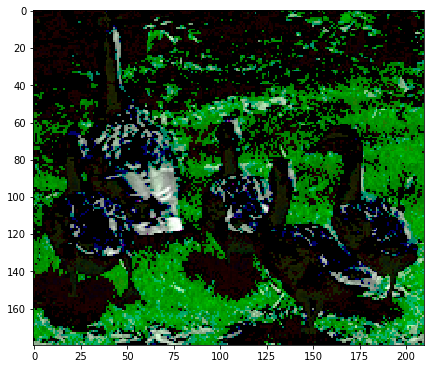

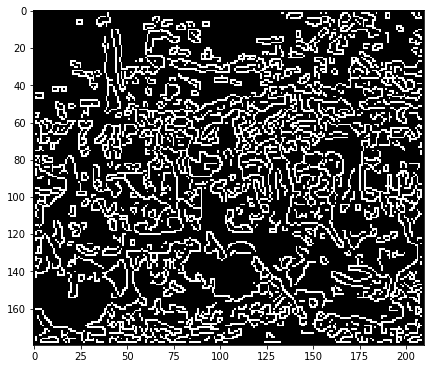

In [101]:
import skimage.feature as feature
image_m=imagen.copy()
image_mt=image_m[miny:maxy,minx:maxx]
image_mt[:,:,0]=image_mt[:,:,2]
image_mt[:,:,1]=image_mt[:,:,1]
image_mt[:,:,2]=image_mt[:,:,0]
(A,B,C)=image_mt.shape
radius=40
for i in range(A):
    for j in range(B):        
            if median_red-radius<=image_mt[i,j,0]<=median_red+radius:
                image_mt[i,j,0] = 0
            if median_blue-radius<=image_mt[i,j,1]<=median_blue+radius:
                image_mt[i,j,1] = 0
            if median_green-radius<=image_mt[i,j,2]<=median_green+radius:
                image_mt[i,j,2] = 0
mostrar_imagen(image_mt)

im_sob=feature.canny(rgb2gray(image_mt))
mostrar_imagen_bn(im_sob)

In [ ]:
from skimage.segmentation import active_contour
from skimage.filters import gaussian
s=np.linspace(0,2*np.pi,400)
r=500+100*np.cos(s)
c=350+100*np.sin(s)
init=np.array([c,r]).T
snake = active_contour(gaussian(imagen,3),init,alpha=0.015,beta=40,gamma=0.001,coordinates='rc')
fig,ax=plt.subplots(figsize=[7,6])
ax.imshow(imagen,cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.show()


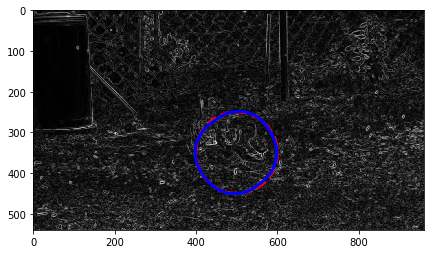

In [37]:
from skimage.segmentation import active_contour
from skimage.filters import gaussian,sobel,prewitt
s=np.linspace(0,2*np.pi,400)
r=500+100*np.cos(s)
c=350+100*np.sin(s)
init=np.array([c,r]).T
sobel_image=prewitt(gaussian(rgb2gray(img_mix)))
snake = active_contour(sobel_image,init,alpha=0.015,beta=40,gamma=0.001,coordinates='rc')
fig,ax=plt.subplots(figsize=[7,6])
ax.imshow(sobel_image,cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.show()

In [ ]:
from skimage.segmentation import chan_vese
cv = chan_vese(imagen_bn, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)


In [ ]:
mostrar_imagen_bn(cv[0])
mostrar_imagen_bn(cv[1])